In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

plt.style.use('ggplot')
# plots of BT only work with this following command
%matplotlib inline

<AxesSubplot:xlabel='date'>

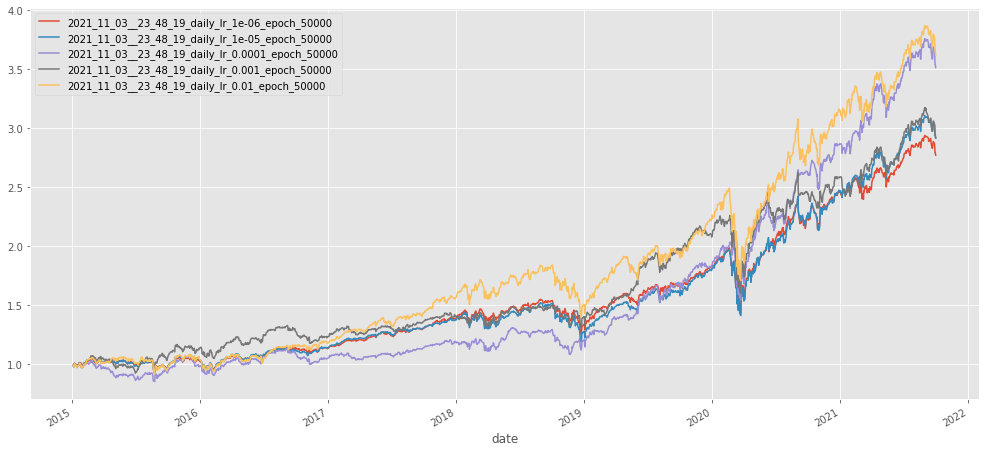

In [24]:
#df_result_back = pd.read_csv('../results/backtest/2021_11_03__11_42_20_aggregated.csv', parse_dates=True, index_col=0)
df_result_back = pd.read_csv('../results/backtest/2021_11_04__01_03_02_aggregated_daily.csv', parse_dates=True, index_col=0)
df_result_back.plot(figsize=(17,8))

<AxesSubplot:xlabel='epoch'>

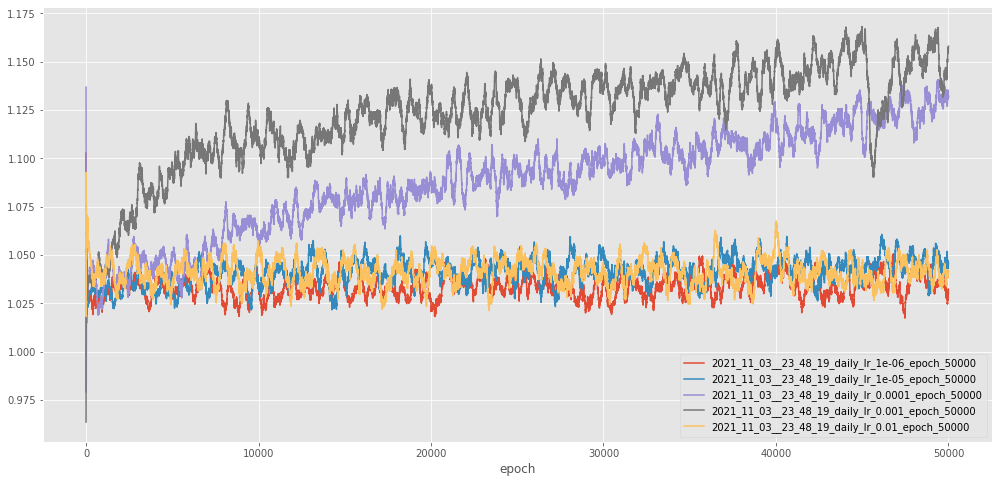

In [25]:
#df_result_train = pd.read_csv('../results/portfolio_values/2021_11_03__11_42_20_aggregated.csv', index_col=0).rolling(300, min_periods=1).mean()
df_result_train = pd.read_csv('../results/portfolio_values/2021_11_04__01_03_01_aggregated_daily.csv', index_col=0).rolling(300, min_periods=1).mean()
df_result_train.plot(figsize=(17,8))

<AxesSubplot:>

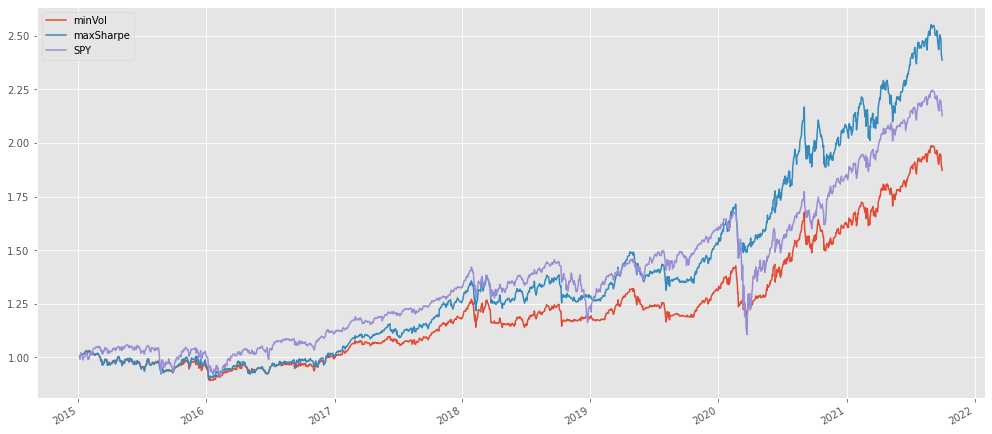

In [4]:
df_baseline = pd.read_csv("../results/backtest/baseline.csv", parse_dates=True, index_col=0)
df_baseline.plot(figsize=(17,8))

In [36]:
map_rename = {
    c: c.replace("2021_11_03__23_48_19_daily_", "")
    for c in df_result_back.columns
}
df_result_back = df_result_back.rename(columns=map_rename)

In [37]:
map_rename

{'2021_11_03__23_48_19_daily_lr_1e-06_epoch_50000': 'lr_1e-06_epoch_50000',
 '2021_11_03__23_48_19_daily_lr_1e-05_epoch_50000': 'lr_1e-05_epoch_50000',
 '2021_11_03__23_48_19_daily_lr_0.0001_epoch_50000': 'lr_0.0001_epoch_50000',
 '2021_11_03__23_48_19_daily_lr_0.001_epoch_50000': 'lr_0.001_epoch_50000',
 '2021_11_03__23_48_19_daily_lr_0.01_epoch_50000': 'lr_0.01_epoch_50000'}

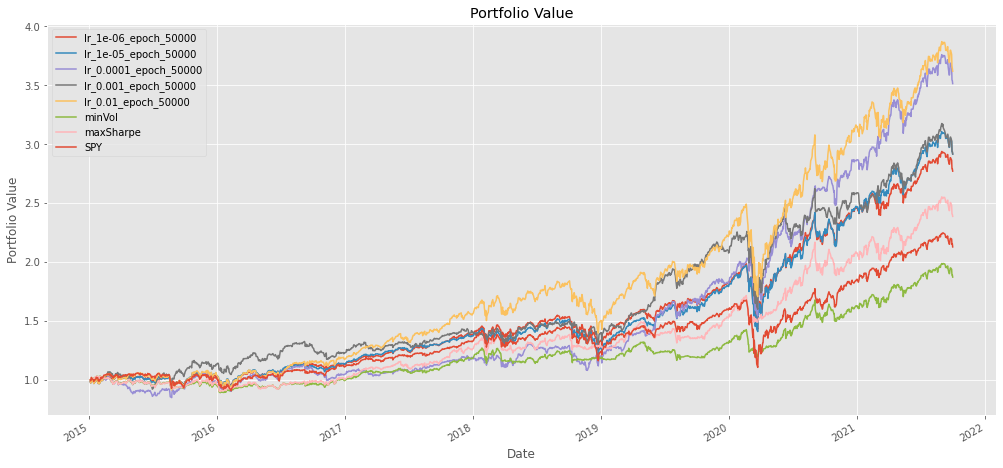

In [42]:
results_backtest = pd.concat([df_result_back, df_baseline], axis=1)
results_backtest[~results_backtest.isnull().any(axis=1)].plot(figsize=(17,8))
plt.title('Portfolio Value')
plt.ylabel('Portfolio Value')
plt.xlabel('Date')
plt.savefig("../results/plots/simple_network_dpg_portfolio_value.png")

In [28]:
results_backtest[~results_backtest.isnull().any(axis=1)].tail()

,2021_11_03__23_48_19_daily_lr_1e-06_epoch_50000,2021_11_03__23_48_19_daily_lr_1e-05_epoch_50000,2021_11_03__23_48_19_daily_lr_0.0001_epoch_50000,2021_11_03__23_48_19_daily_lr_0.001_epoch_50000,2021_11_03__23_48_19_daily_lr_0.01_epoch_50000,minVol,maxSharpe,SPY
2021-09-24,2.883095,3.048067,3.687078,3.059958,3.797189,1.949955,2.504724,2.200625
2021-09-27,2.863195,3.021563,3.651322,3.030278,3.760359,1.937709,2.480430,2.194329
2021-09-28,2.791585,2.936649,3.543094,2.940457,3.648898,1.889467,2.406907,2.150109
2021-09-29,2.790964,2.933983,3.538631,2.936747,3.644294,1.889865,2.403870,2.153728
2021-09-30,2.770360,2.914744,3.513379,2.915659,3.618125,1.871530,2.386609,2.127404
